In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Read the seattleWeather_1948-2017.csv file
df=pd.read_csv("seattleWeather_1948-2017.csv")

In [3]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [5]:
#check the null values for all columns in Dataframe
df.isnull().sum()
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [6]:
# Get the Null values

In [7]:
df[df['PRCP'].isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [10]:
df.RAIN.value_counts()

RAIN
False    14648
True     10900
Name: count, dtype: int64

In [11]:
#Encoe the categorical vales
from sklearn.preprocessing import LabelEncoder 
Le=LabelEncoder()

In [12]:
df['RAIN']=Le.fit_transform(df['RAIN'])

In [13]:
df['RAIN']

0        1
1        1
2        1
3        1
4        1
        ..
25546    0
25547    0
25548    0
25549    0
25550    0
Name: RAIN, Length: 25548, dtype: int32

In [14]:
#WE can drop outlier if we have sufficient data
#We keep outlier as outliers are information and provides diversity
#Model outlier value separately


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TMAX', ylabel='Count'>

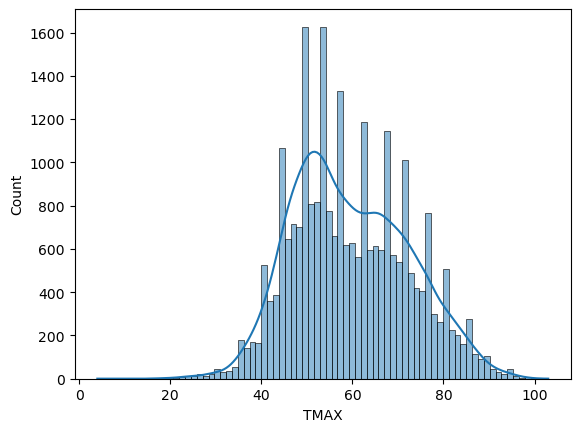

In [15]:
#Distribution of value of continuous variable can be checked using histogram or distplot
sns.histplot(df['TMAX'],kde=True)
#kde is kernel density estimator


In [16]:
plt.show()

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


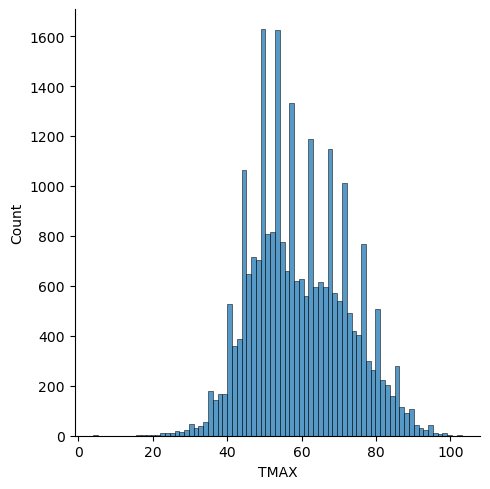

In [17]:
sns.displot(df['TMAX'])

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


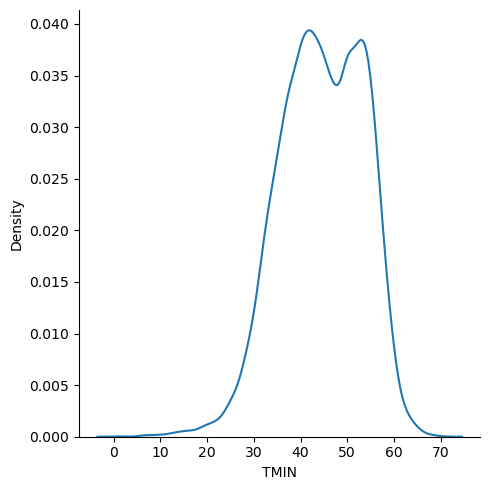

In [18]:
sns.displot(df['TMIN'],kind='kde')

In [19]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='PRCP', ylabel='Density'>

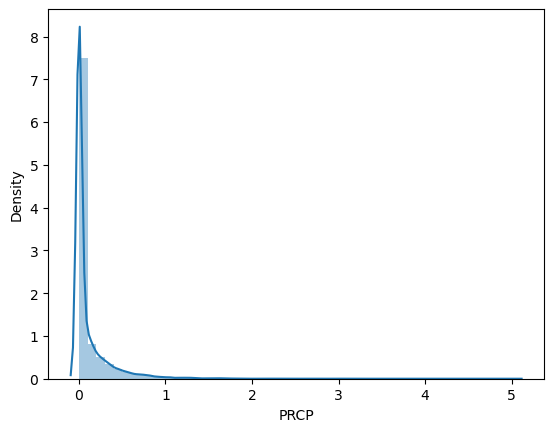

In [20]:
sns.distplot(df['PRCP'])

<Axes: xlabel='TMIN'>

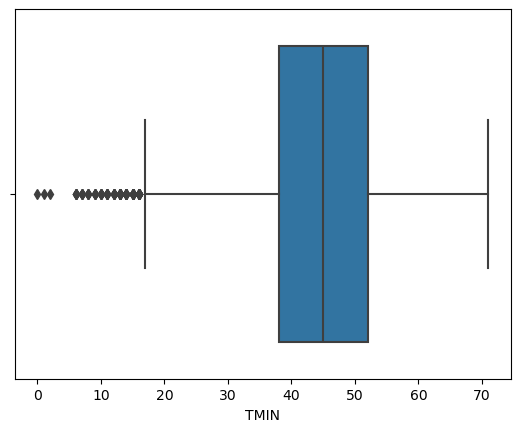

In [21]:
sns.boxplot(data=df,x='TMIN')

<Axes: title={'center': 'Maximum Temparature'}>

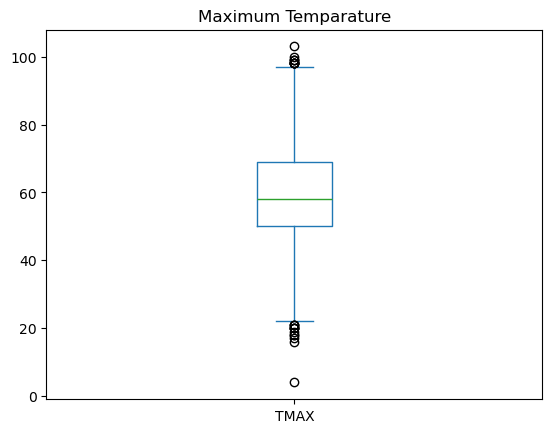

In [22]:
df['TMAX'].plot(kind='box',title='Maximum Temparature')


<Axes: >

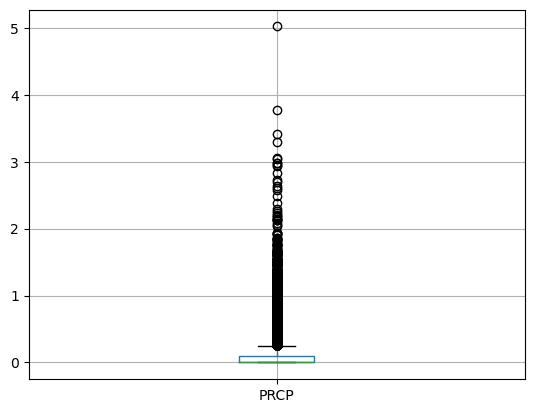

In [23]:
df.boxplot(column='PRCP')

In [24]:
#def outlier_rem(df,col):try with 1.5 IQR ,check and if requied apply 3IQR)
#    Q1=df[col].quantile(0.25)
#    Q3=df[col].quantile(0.75)
#    IQR=Q3-Q1
#    df=df.loc[~((df[col]<(Q1-3*IQR))|(df[col]>(Q3+3*IQR))),]
#    return df


In [25]:
#df_PRCP=outlier_rem(df,'PRCP')
#df_TMAX=outlier_rem(df,'TMAX')
#df_TMIN=outlier_rem(df,'TMIN')
#df=outlier_rem(df,'PRCP')
#df=outlier_rem(df,'TMAX')
#df=outlier_rem(df,'TMIN')

<Axes: xlabel='TMAX'>

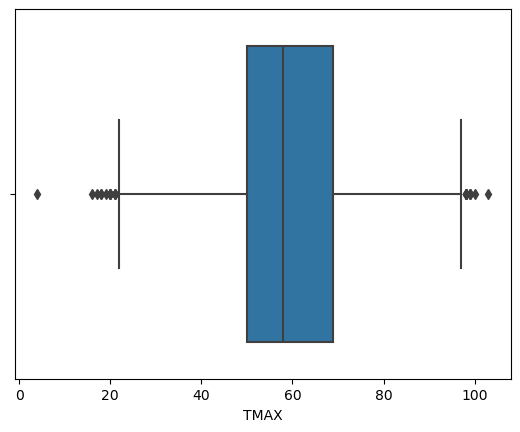

In [26]:
sns.boxplot(data=df,x='TMAX')

In [27]:
df.shape

(25548, 5)

<Axes: xlabel='TMIN'>

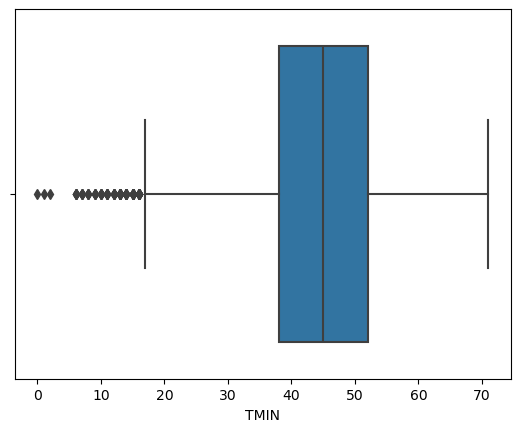

In [28]:
sns.boxplot(data=df,x='TMIN')

In [29]:
df.drop(df[(df['TMAX']>97)|(df['TMAX']<21)].index,inplace=True)

In [30]:
df.shape

(25527, 5)

In [31]:
df.drop(df[(df['TMIN']<17)].index,inplace=True)

In [32]:
df.drop(df[(df['PRCP']>0.2)].index,inplace=True)

In [33]:
df.shape

(21207, 5)

<Axes: xlabel='TMAX'>

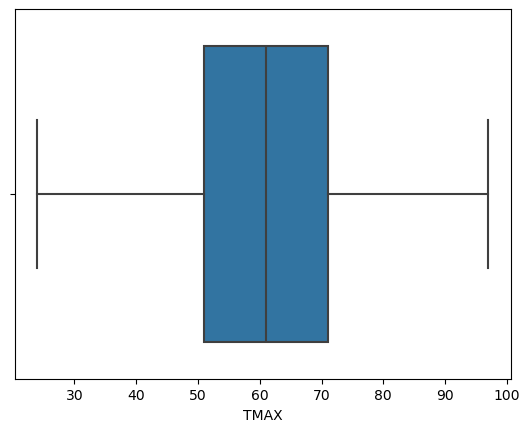

In [34]:
sns.boxplot(data=df,x='TMAX')

<Axes: xlabel='TMIN'>

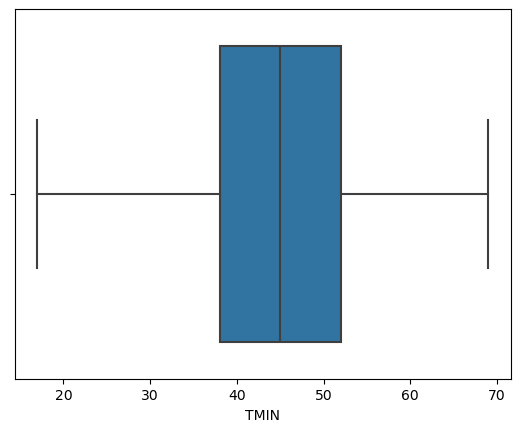

In [35]:
sns.boxplot(data=df,x='TMIN')

<Axes: xlabel='PRCP'>

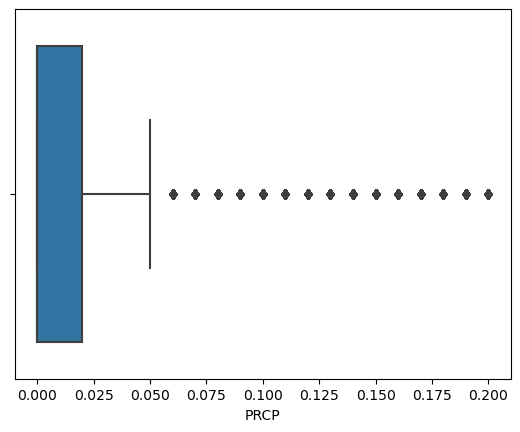

In [36]:
sns.boxplot(data=df,x='PRCP')

In [37]:
x=df.drop(['RAIN','DATE'],axis=1)

In [38]:
y=df['RAIN']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
#Take 70 percent data from testing and 30 percent for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=42)

In [41]:
x_train,x_test,y_train,y_test

(       PRCP  TMAX  TMIN
 3172   0.00    68    50
 20694  0.00    72    58
 18358  0.00    55    42
 12168  0.00    56    43
 3070   0.00    68    42
 ...     ...   ...   ...
 13669  0.00    67    53
 14470  0.12    69    56
 6608   0.03    53    44
 1089   0.00    48    41
 19083  0.00    62    41
 
 [14844 rows x 3 columns],
        PRCP  TMAX  TMIN
 7612   0.00    52    39
 21975  0.07    50    39
 18704  0.02    52    40
 12001  0.17    51    40
 10387  0.00    69    53
 ...     ...   ...   ...
 3468   0.00    68    49
 9702   0.00    75    54
 20268  0.00    77    59
 8912   0.00    82    48
 1606   0.00    65    46
 
 [6363 rows x 3 columns],
 3172     0
 20694    0
 18358    0
 12168    0
 3070     0
         ..
 13669    0
 14470    1
 6608     1
 1089     0
 19083    0
 Name: RAIN, Length: 14844, dtype: int32,
 7612     0
 21975    1
 18704    1
 12001    1
 10387    0
         ..
 3468     0
 9702     0
 20268    0
 8912     0
 1606     0
 Name: RAIN, Length: 6363, dtype: int

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
#Fit the model with logistic regression
lr=LogisticRegression()
x_train.head()
y_train.head()

3172     0
20694    0
18358    0
12168    0
3070     0
Name: RAIN, dtype: int32

In [44]:
lr.fit(x_train,y_train)

LogisticRegression()

In [45]:
#Predict with test dataset
pred=lr.predict(x_test)


In [46]:
y_test.head()

7612     0
21975    1
18704    1
12001    1
10387    0
Name: RAIN, dtype: int32

In [47]:
pred

array([0, 1, 0, ..., 0, 0, 0])

In [48]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,pred)

In [49]:
accuracy

0.9113625648279113

In [50]:
#The first column is the probability that the entry has the 0 label and the second column is the probability that the entry has the +1 label
lr.predict_proba(x_test)

array([[0.81136233, 0.18863767],
       [0.15862039, 0.84137961],
       [0.61942903, 0.38057097],
       ...,
       [0.89123132, 0.10876868],
       [0.99184147, 0.00815853],
       [0.91499072, 0.08500928]])

In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)

In [52]:
cm

array([[4366,   19],
       [ 545, 1433]], dtype=int64)

In [53]:
#Prediction of new data
X_new=[[2.2,45,20]]
Pred_new=lr.predict(X_new)

In [54]:
Pred_new

array([1])

In [55]:
lr.predict_proba(X_new)

array([[0., 1.]])